In [1]:
import numpy as np
import pandas as pd
import math

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.float_format = '{:.2f}'.format
# pd.options.display.max_rows = None  # 모든 row 내용 print
pd.options.display.max_rows = 20

In [3]:
# Provide the names for the columns since the CSV file with the data does not have a header row.
feature_names = ['symboling', 'normalized-losses', 'make', 'fuel-type',
        'aspiration', 'num-doors', 'body-style', 'drive-wheels',
        'engine-location', 'wheel-base', 'length', 'width', 'height', 'weight',
        'engine-type', 'num-cylinders', 'engine-size', 'fuel-system', 'bore',
        'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg', 'price']

In [4]:
# Load in the data from a CSV file that is comma separated.
car_data = pd.read_csv('https://storage.googleapis.com/mledu-datasets/cars_data.csv',
                     sep=',', names=feature_names, header=None, encoding='latin-1')

In [5]:
car_data = car_data.reindex(np.random.permutation(car_data.index))
# or equivalently,
# car_data = car_data.sample(frac=1)

In [6]:
car_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
148,0,85,subaru,gas,std,four,wagon,4wd,front,96.90,...,108,2bbl,3.62,2.64,9.00,82,4800,23,29,8013
159,0,91,toyota,diesel,std,four,hatchback,fwd,front,95.70,...,110,idi,3.27,3.35,22.50,56,4500,38,47,7788
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
142,0,102,subaru,gas,std,four,sedan,fwd,front,97.20,...,108,2bbl,3.62,2.64,9.50,82,4400,28,33,7775
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.50,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,?


In [7]:
LABEL = 'price'

numeric_feature_names = ['symboling', 'normalized-losses', 'wheel-base',
        'length', 'width', 'height', 'weight', 'engine-size', 'horsepower',
        'peak-rpm', 'city-mpg', 'highway-mpg', 'bore', 'stroke',
         'compression-ratio']

categorical_feature_names = list(set(feature_names) - set(numeric_feature_names) - set([LABEL]))

categorical_feature_names

assert len(numeric_feature_names) == 15
assert len(categorical_feature_names) == 10

In [8]:
# Run to inspect numeric features.
car_data[numeric_feature_names]

,symboling,normalized-losses,wheel-base,length,width,height,weight,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,bore,stroke,compression-ratio
148,0,85,96.90,173.60,65.40,54.90,2420,108,82,4800,23,29,3.62,2.64,9.00
159,0,91,95.70,166.30,64.40,52.80,2275,110,56,4500,38,47,3.27,3.35,22.50
4,2,164,99.40,176.60,66.40,54.30,2824,136,115,5500,18,22,3.19,3.40,8.00
142,0,102,97.20,172.00,65.40,52.50,2190,108,82,4400,28,33,3.62,2.64,9.50
44,1,?,94.50,155.90,63.60,52.00,1874,90,70,5400,38,43,3.03,3.11,9.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,-1,95,109.10,188.80,68.90,55.50,3062,141,114,5400,19,25,3.78,3.15,9.50
27,1,148,93.70,157.30,63.80,50.60,2191,98,102,5500,24,30,3.03,3.39,7.60
184,2,94,97.30,171.70,65.50,55.70,2264,97,52,4800,37,46,3.01,3.40,23.00
75,1,?,102.70,178.40,68.00,54.80,2910,140,175,5000,19,24,3.78,3.12,8.00


In [9]:
for feature_name in numeric_feature_names + [LABEL]:
    car_data[feature_name] = pd.to_numeric(car_data[feature_name], errors ='coerce')

"""
errors: error는 총 3개의 옵션이 존재합니다.
- errors = 'ignore' -> 만약 숫자로 변경할 수 없는 데이터라면 숫자로 변경하지 않고 원본 데이터를 그대로 반환합니다.
- errors = 'coerce' -> 만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환합니다.
- errors = 'raise' -> 만약 숫자로 변경할 수 없는 데이터라면 에러를 일으키며 코드를 중단합니다."""
    
# Fill missing values with 0.
# Is this an OK thing to do? You may want to come back and revisit this decision later.
car_data.fillna(0, inplace=True)

In [10]:
car_data[numeric_feature_names]

,symboling,normalized-losses,wheel-base,length,width,height,weight,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,bore,stroke,compression-ratio
148,0,85.00,96.90,173.60,65.40,54.90,2420,108,82.00,4800.00,23,29,3.62,2.64,9.00
159,0,91.00,95.70,166.30,64.40,52.80,2275,110,56.00,4500.00,38,47,3.27,3.35,22.50
4,2,164.00,99.40,176.60,66.40,54.30,2824,136,115.00,5500.00,18,22,3.19,3.40,8.00
142,0,102.00,97.20,172.00,65.40,52.50,2190,108,82.00,4400.00,28,33,3.62,2.64,9.50
44,1,0.00,94.50,155.90,63.60,52.00,1874,90,70.00,5400.00,38,43,3.03,3.11,9.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,-1,95.00,109.10,188.80,68.90,55.50,3062,141,114.00,5400.00,19,25,3.78,3.15,9.50
27,1,148.00,93.70,157.30,63.80,50.60,2191,98,102.00,5500.00,24,30,3.03,3.39,7.60
184,2,94.00,97.30,171.70,65.50,55.70,2264,97,52.00,4800.00,37,46,3.01,3.40,23.00
75,1,0.00,102.70,178.40,68.00,54.80,2910,140,175.00,5000.00,19,24,3.78,3.12,8.00


In [16]:
from sklearn.pipeline import Pipeline

In [19]:
car_attribs = ["length", "width", "height"]

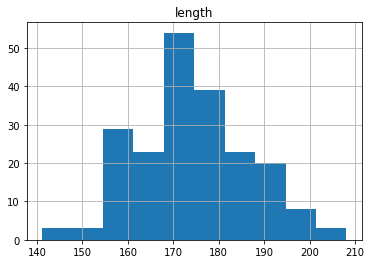

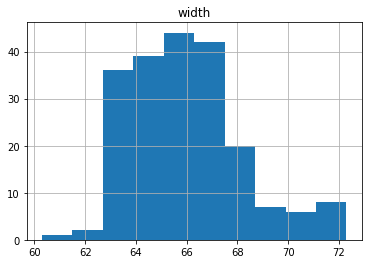

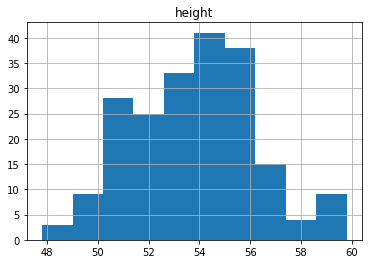

In [20]:
for feature_name in car_attribs:
  car_data.hist(column=feature_name)

In [21]:
class standard_test1():
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [22]:
at = standard_test(car_attribs)

In [23]:
at.fit(car_data['length'])

In [25]:
aa = at.transform(car_data)

In [26]:
aa

array([[173.6,  65.4,  54.9],
       [166.3,  64.4,  52.8],
       [176.6,  66.4,  54.3],
       [172. ,  65.4,  52.5],
       [155.9,  63.6,  52. ],
       [159.1,  64.2,  54.1],
       [171.7,  65.5,  55.7],
       [157.3,  63.8,  50.6],
       [175.6,  66.5,  53.9],
       [188.8,  67.2,  56.2],
       [177.8,  66.5,  55.5],
       [176.2,  65.6,  52. ],
       [175.4,  62.5,  54.1],
       [176.6,  66.2,  54.3],
       [165.7,  64. ,  51.4],
       [165.6,  63.8,  53.3],
       [186.7,  68.4,  56.7],
       [177.8,  66.5,  55.5],
       [171.7,  65.5,  55.7],
       [180.3,  70.5,  50.8],
       [167.5,  65.2,  53.3],
       [159.1,  64.2,  54.1],
       [157.3,  63.8,  50.6],
       [174.6,  64.6,  59.8],
       [173. ,  65.4,  49.4],
       [157.3,  64.4,  50.8],
       [155.9,  63.6,  52. ],
       [168.8,  64.1,  48.8],
       [165.3,  63.8,  54.5],
       [172. ,  65.4,  54.3],
       [181.5,  66.5,  55.2],
       [168.9,  68.3,  50.2],
       [191.7,  70.6,  47.8],
       [17

표준화후에 log1p 수행하기

In [27]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data = np.log1p(df1['ixic'])
plt.hist(data)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('level', LevelChanger()),
        ('cat_encoder', OneHotEncoder(categories='auto', sparse=False))
    ])

In [28]:
class FeatureNameSelecor():
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [29]:
class LogScale():
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return np.log1p(X[self.attribute_names]).values

In [45]:
ls = LogScale(car_attribs)

In [46]:
ls.fit(car_data['length'])

In [47]:
lsa = ls.transform(car_data)

In [48]:
lsa

array([[5.16249764, 4.19569706, 4.02356438],
       [5.11978861, 4.18052226, 3.98527347],
       [5.17953383, 4.21064502, 4.01277291],
       [5.15329159, 4.19569706, 3.97968165],
       [5.05560866, 4.16821441, 3.97029191],
       [5.07579862, 4.17745947, 4.00914972],
       [5.15155599, 4.19720195, 4.03777421],
       [5.06449197, 4.1713056 , 3.94352167],
       [5.17388729, 4.2121276 , 4.00551335],
       [5.24597089, 4.22244456, 4.0465539 ],
       [5.18626786, 4.2121276 , 4.03424064],
       [5.17727904, 4.19870458, 3.97029191],
       [5.17275414, 4.15103991, 4.00914972],
       [5.17953383, 4.20767325, 4.01277291],
       [5.11619579, 4.17438727, 3.95890659],
       [5.11559573, 4.1713056 , 3.99452423],
       [5.23484494, 4.23988687, 4.05525717],
       [5.18626786, 4.2121276 , 4.03424064],
       [5.15155599, 4.19720195, 4.03777421],
       [5.20015312, 4.26969745, 3.94739015],
       [5.12693575, 4.19268046, 3.99452423],
       [5.07579862, 4.17745947, 4.00914972],
       [5.

In [44]:
del ls

.fit이 있는 이유는?

https://givitallugot.github.io/articles/2020-03/Python-preprocessing-1-pipe1
https://givitallugot.github.io/articles/2020-03/Python-preprocessing-2-pipe2 
https://givitallugot.github.io/articles/2020-06/Python-preprocessing-3-pipe3